In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [3]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# hyper paramter 
input_size= 784  #28*28
hidden_size=100
num_classes=10
num_epochs=2
batch_size =100
learning_rate =0.001

In [5]:
#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,
                transform=transforms.ToTensor(), 
                download=True ) #if not downloaded


test_dataset = torchvision.datasets.MNIST(root='./data',train=False,
                transform=transforms.ToTensor())

C:\Users\Rahul\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
train_loader =torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader =torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size)

In [7]:
#lets see batch 
examples =iter(train_loader)
samples,labels=examples.next()
print(samples.shape,labels.shape)   # (batchsize,color channel,size,size)

torch.Size([100, 1, 28, 28]) torch.Size([100])


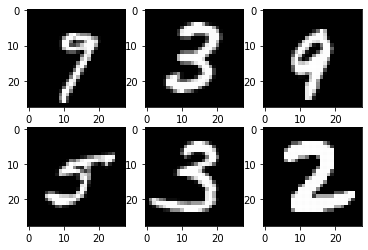

In [9]:
%matplotlib inline

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()    

In [10]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1=nn.Linear(input_size,100)
        self.relu =nn.ReLU()
        self.l2=nn.Linear(100,50)
        self.relu =nn.ReLU()
        self.l3 =nn.Linear(50,num_classes)
        
    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        out=self.relu(out)
        out=self.l3(out)
        return out

In [11]:
model=NeuralNet(input_size,100,num_classes)

# Loss and optimizer 

criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=learning_rate)

#trainind loop

n_total_steps = len(train_loader) # for batch
    
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        # reshaping images i.e. flattening 
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)  
    
        # forward pass 
        outputs=model(images)
        loss=criterion(outputs,labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 ==0:
            print(f'epoch{epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss={loss.item():.4f}')
        

epoch1/2,step 100/600,loss=0.3504
epoch1/2,step 200/600,loss=0.2944
epoch1/2,step 300/600,loss=0.3367
epoch1/2,step 400/600,loss=0.2275
epoch1/2,step 500/600,loss=0.2735
epoch1/2,step 600/600,loss=0.1632
epoch2/2,step 100/600,loss=0.1314
epoch2/2,step 200/600,loss=0.1696
epoch2/2,step 300/600,loss=0.1370
epoch2/2,step 400/600,loss=0.1778
epoch2/2,step 500/600,loss=0.1332
epoch2/2,step 600/600,loss=0.1866


In [12]:
#test
with torch.no_grad():
    n_correct=0
    n_samples=0
    
    for images,labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)\
        
        outputs=model(images)
        
        #value,index [class label]
        _,pred=torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct+= (pred==labels).sum().item() #to get data inside tensor doesnt affect ans if not used just prettyfy it
        
print("accuracy",100* n_correct/n_samples)    

accuracy 95.76


In [14]:
class NeuralNet2(nn.Module):
    def __init__(self,input_size,num_classes):
        super(NeuralNet2,self).__init__()
        
        self.l1 = nn.Sequential(
            nn.Linear(input_size,500),
            nn.ReLU(),
            nn.Linear(500,400),
            nn.ReLU()
        )
        
        
        self.l2 = nn.Sequential(
            nn.Linear(400,300),
            nn.ReLU(),
            nn.Linear(300,200),
            nn.ReLU()
        )
        
        
        
        self.l3 = nn.Sequential(
            nn.Linear(200,100),
            nn.ReLU(),
            nn.Linear(100,num_classes),
        
        )
        
    def forward(self,x):
        out=self.l1(x)
        out=self.l2(out)           
        out=self.l3(out)
        return out

## AGAR RELU LAYER MAI NA DAAL KE DIRECT LIKHNA HO

import torch.nn.functional as F


self.l1 = nn.Sequential(

            nn.Linear(input_size,500),
            
            nn.Linear(500,400)
            
        )
        
   
def forward(self,x):

        out=F.relu(self.l1(x))
        
        out=F.relu(self.l2(out))    
        
        out=F.relu(self.l3(out))
        
        return out

In [15]:
model=NeuralNet2(input_size,num_classes)

# Loss and optimizer 

criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=learning_rate)

#trainind loop

n_total_steps = len(train_loader) # for batch
    
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        # reshaping images i.e. flattening 
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)  
    
        # forward pass 
        outputs=model(images)
        loss=criterion(outputs,labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 ==0:
            print(f'epoch{epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss={loss.item():.4f}')

epoch1/2,step 100/600,loss=0.4295
epoch1/2,step 200/600,loss=0.4470
epoch1/2,step 300/600,loss=0.0929
epoch1/2,step 400/600,loss=0.1349
epoch1/2,step 500/600,loss=0.1847
epoch1/2,step 600/600,loss=0.1216
epoch2/2,step 100/600,loss=0.0822
epoch2/2,step 200/600,loss=0.2208
epoch2/2,step 300/600,loss=0.0544
epoch2/2,step 400/600,loss=0.0627
epoch2/2,step 500/600,loss=0.0901
epoch2/2,step 600/600,loss=0.0254


In [16]:
#test
with torch.no_grad():
    n_correct=0
    n_samples=0
    
    for images,labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)\
        
        outputs=model(images)
        
        #value,index [class label]
        _,pred=torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct+= (pred==labels).sum().item() #to get data inside tensor doesnt affect ans if not used just prettyfy it
        
print("accuracy",100* n_correct/n_samples)  

accuracy 97.03



# -------------------------------------
class CNN_Network(nn.Module):
    def __init__(self):
        super(CNN_Network, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, stride=1, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)


        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, stride=1, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(stride=2, kernel_size=2),  # 30 80
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, stride=1, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),   # 15 40
        )

        self.fc = nn.Sequential(
            nn.Linear(256 * 15 * 40, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 40)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.softmax(x, dim=-1)
        return x


model = CNN_Network()

# -------------------------------------